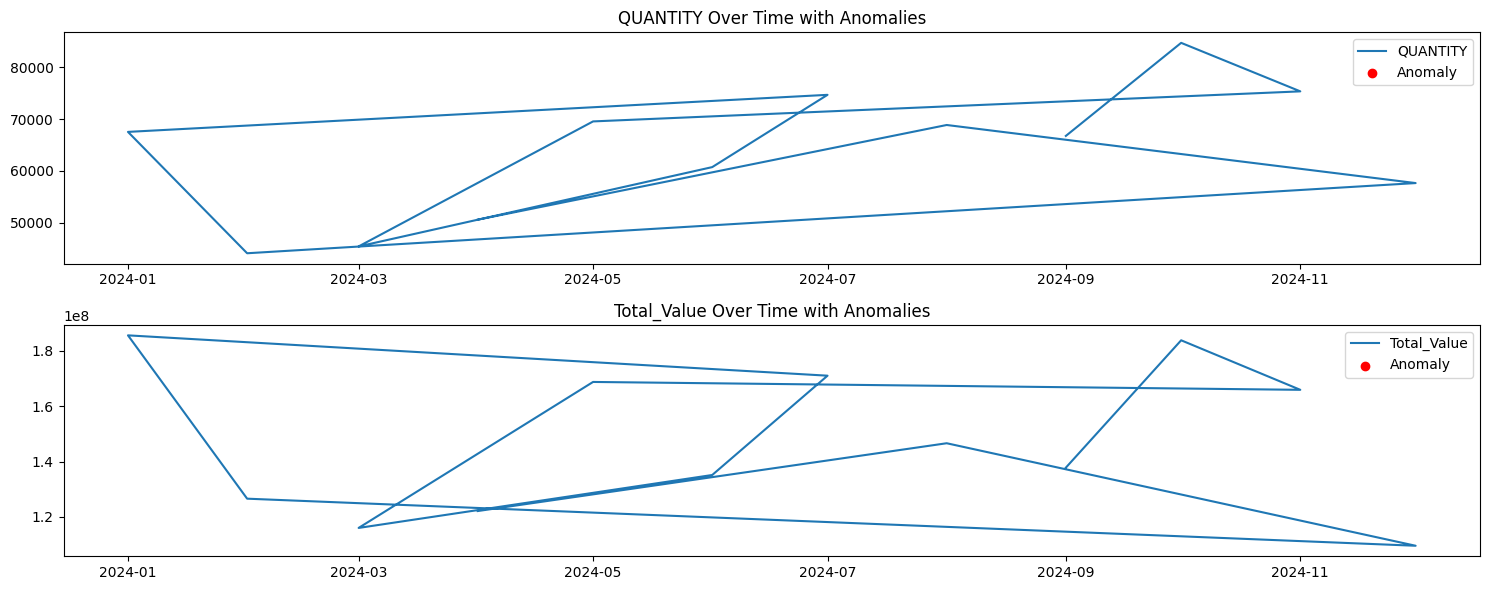

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def detect_anomalies(df, threshold=2):
    # Aggregate by Month-Year
    monthly_data = df.groupby('Month-Year').agg({
        'QUANTITY': 'sum',
        'Total_Value': 'sum'
    }).reset_index()

    # Detect anomalies using standard deviation
    for col in ['QUANTITY', 'Total_Value']:
        mean = monthly_data[col].mean()
        std = monthly_data[col].std()
        threshold_upper = mean + threshold * std
        threshold_lower = mean - threshold * std
        monthly_data[f'{col}_Anomaly'] = (monthly_data[col] > threshold_upper) | (monthly_data[col] < threshold_lower)

    return monthly_data

def plot_anomalies(df, anomaly_data):
    # Convert Month-Year to datetime for plotting
    anomaly_data['Month-Year'] = pd.to_datetime(anomaly_data['Month-Year'], format='%B %Y')

    plt.figure(figsize=(15, 6))

    # Plot QUANTITY
    plt.subplot(2, 1, 1)
    plt.plot(anomaly_data['Month-Year'], anomaly_data['QUANTITY'], label='QUANTITY')
    plt.scatter(
        anomaly_data['Month-Year'][anomaly_data['QUANTITY_Anomaly']],
        anomaly_data['QUANTITY'][anomaly_data['QUANTITY_Anomaly']],
        color='red',
        label='Anomaly',
    )
    plt.title('QUANTITY Over Time with Anomalies')
    plt.legend()

    # Plot Total_Value
    plt.subplot(2, 1, 2)
    plt.plot(anomaly_data['Month-Year'], anomaly_data['Total_Value'], label='Total_Value')
    plt.scatter(
        anomaly_data['Month-Year'][anomaly_data['Total_Value_Anomaly']],
        anomaly_data['Total_Value'][anomaly_data['Total_Value_Anomaly']],
        color='red',
        label='Anomaly',
    )
    plt.title('Total_Value Over Time with Anomalies')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
df = pd.read_csv('../cleaned_data.csv')
anomaly_data = detect_anomalies(df, threshold=2)
plot_anomalies(df, anomaly_data)
